In [1]:
from __future__ import print_function
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
from torch.autograd import Variable


In [2]:
# read in the dataset Gluon
file_name_g = open('data/g1M.out','r')
data_gluon=[]
for line in file_name_g.readlines():
    data_gluon.append(line.strip().split())
file_name_g.close()
# read in the dataset Quark
file_name_q = open('data/q1M.out','r')
data_quark=[]
for line in file_name_q.readlines():
    data_quark.append(line.strip().split())
file_name_q.close()

In [3]:
#create a DataFrame, we transform the imported data in Dataframe
df_gluon=pd.DataFrame(data_gluon)
df_quark=pd.DataFrame(data_quark)

In [4]:
#concatenate the both dataset. we combine the quark set and gluon set in the same data set
data=pd.concat([df_gluon,df_quark])
#A Brief description of the dataset
data.describe()

,0,1,2,3,4,5
count,1256966,1256966,1256966,1256966,1237968,1237968
unique,735801,10010,625283,613577,708139,3
top,Event,0.1,(1,elapsed),0,1
freq,19736,678143,738,18998,62,699717


In [5]:
#From the above description, we observed taht the data set containt a string "Event", we have to clean. 
data[data[0].str.contains('Event')].count()

0    19736
1    19736
2    19736
3    19736
4      738
5      738
dtype: int64

In [6]:
#Clean data
data=data[data[0]!='Event']
#we print the first 5 elements of the data set
data.head()

,0,1,2,3,4,5
0,0.0755577,0.2,0.189465,0.104326,0.0544762,0
1,0.0639362,0.1,0.184013,0.058119,0.0475469,0
2,0.0369286,0.1,0.139499,0.446972,0.0292832,0
3,0.167616,0.2,0.383354,0.309005,0.11008,0
4,0.218167,0.2,0.345461,0.128316,0.110414,0


In [7]:
#rename column by using the name of variables that describe the event
data.rename(columns={0:'nmass',1:'nsub',2:'lha',3:'zg',4:'ci',5:'origin'},inplace=True)
#we print the five first element
data.head()

,nmass,nsub,lha,zg,ci,origin
0,0.0755577,0.2,0.189465,0.104326,0.0544762,0
1,0.0639362,0.1,0.184013,0.058119,0.0475469,0
2,0.0369286,0.1,0.139499,0.446972,0.0292832,0
3,0.167616,0.2,0.383354,0.309005,0.11008,0
4,0.218167,0.2,0.345461,0.128316,0.110414,0


In [8]:
features = data.drop('origin', axis=1)
targets = data['origin']
print(features[:10])
print(targets[:10])

       nmass nsub       lha         zg         ci
0  0.0755577  0.2  0.189465   0.104326  0.0544762
1  0.0639362  0.1  0.184013   0.058119  0.0475469
2  0.0369286  0.1  0.139499   0.446972  0.0292832
3   0.167616  0.2  0.383354   0.309005    0.11008
4   0.218167  0.2  0.345461   0.128316   0.110414
5   0.526424  0.2  0.705519   0.423706   0.280389
6  0.0913633  0.2  0.190319  0.0550395  0.0569352
7   0.112613  0.2  0.229782   0.125332  0.0655758
8   0.503168  0.4  0.697395   0.113624   0.291295
9  0.0267763  0.1  0.120125   0.100771  0.0247467
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: origin, dtype: object


In [9]:
features=features.astype('float')
targets=targets.astype('float')
 

In [10]:
#We split the data set by taking 80% of data for training and 20% for testing. Note we use a rondom sampling
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=1)

In [11]:
# wrap up with Variable in pytorch
train_X = Variable(torch.Tensor(X_train.values).float())
test_X = Variable(torch.Tensor(X_test.values).float())
train_y = Variable(torch.Tensor(y_train.values).float())
test_y = Variable(torch.Tensor(y_test.values).float())

In [95]:
# Define network dimensions
n_input_dim = train_X .shape[1]
# Layer size
n_hidden = 4 # Number of hidden nodes
n_output = 1 # Number of output nodes = for binary classifier

# Build your network
net = nn.Sequential(
    nn.Linear(n_input_dim, n_hidden),
    nn.ELU(),
    nn.Linear(n_hidden, n_output),
    nn.Sigmoid())
    
print(net)

Sequential(
  (0): Linear(in_features=5, out_features=4, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=4, out_features=1, bias=True)
  (3): Sigmoid()
)


In [125]:
#Define the lost function 
loss_func = nn.BCELoss()
learning_rate = 0.2
#Set the optimize, we choose Adam
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [126]:
#We run the train 
train_loss = []
epoch = 250
Y_train_t = torch.FloatTensor(train_y).reshape(-1, 1)
for epoch in range(epoch):
    net.cpu()
    X_train_t = torch.FloatTensor(train_X).to(device='cpu')
    y_hat = net(X_train_t).to(device='cpu')
    loss = loss_func(y_hat, Y_train_t).to(device='cpu')
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    train_loss.append(loss.item())
    if epoch % 10 == 0:
        print ('number of epoch', epoch, 'loss', loss.data[0])
print("Finished training!")

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


number of epoch 0 loss tensor(0.5034)
number of epoch 10 loss tensor(0.5868)
number of epoch 20 loss tensor(0.5119)
number of epoch 30 loss tensor(0.5192)
number of epoch 40 loss tensor(0.5051)
number of epoch 50 loss tensor(0.5061)
number of epoch 60 loss tensor(0.5036)
number of epoch 70 loss tensor(0.5031)
number of epoch 80 loss tensor(0.5028)
number of epoch 90 loss tensor(0.5026)
number of epoch 100 loss tensor(0.5024)
number of epoch 110 loss tensor(0.5022)
number of epoch 120 loss tensor(0.5021)
number of epoch 130 loss tensor(0.5020)
number of epoch 140 loss tensor(0.5018)
number of epoch 150 loss tensor(0.5017)
number of epoch 160 loss tensor(0.5016)
number of epoch 170 loss tensor(0.5014)
number of epoch 180 loss tensor(0.5013)
number of epoch 190 loss tensor(0.5012)
number of epoch 200 loss tensor(0.5011)
number of epoch 210 loss tensor(0.5009)
number of epoch 220 loss tensor(0.5008)
number of epoch 230 loss tensor(0.5007)
number of epoch 240 loss tensor(0.5005)
Finished tr

In [127]:
y_hat

tensor([[0.8511],
        [0.6902],
        [0.2966],
        ...,
        [0.5100],
        [0.8115],
        [0.3953]], grad_fn=<SigmoidBackward>)

In [128]:
#We convert the sigmoid result to a corresponding class
y_hat=torch.round(y_hat)
y_hat

tensor([[1.],
        [1.],
        [0.],
        ...,
        [1.],
        [1.],
        [0.]], grad_fn=<RoundBackward>)

In [130]:
print ('prediction accuracy', accuracy_score(train_y, y_hat.detach().numpy()))
print ('macro precision', precision_score(train_y, y_hat.detach().numpy()))

prediction accuracy 0.7555719227629463
macro precision 0.7879921313377632


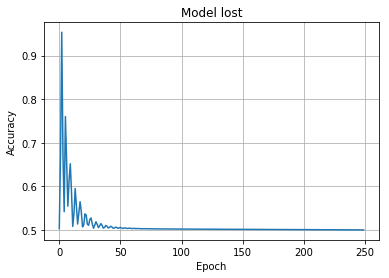

In [131]:
# Plot training & validation accuracy values
plt.plot(train_loss,'-')
plt.title('Model lost')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.savefig("lost.png")
plt.show()

Our network trained over the 1,000 iterations and pushed its classification accuracy towards 75%. Let’s  visualize this to see how well it fares on our test set. 

In [102]:
X_test_t = torch.FloatTensor(test_X)
y_hat_test = net(X_test_t)

In [112]:
#Create the class, we could also use torch.round()
y_hat_test=np.where(y_hat_test<0.5,0,1)

In [104]:
print ('Test accuracy', accuracy_score(test_y , y_hat_test))
print ('macro precision', precision_score(test_y.data, y_hat_test.data, average='macro'))
print ('micro precision', precision_score(test_y.data, y_hat_test.data, average='micro'))
print ('macro recall', recall_score(test_y.data, y_hat_test.data, average='macro'))
print ('micro recall', recall_score(test_y.data, y_hat_test.data, average='micro'))

Test accuracy 0.7474075151750281
macro precision 0.7433905050611125
micro precision 0.7474075151750281
macro recall 0.7396644879878598
micro recall 0.7474075151750281


We could improve the network by using, dropout, or regularization and see the result. To avoid overfitting in the begining of the training